## highs & lows: birbiri ile besliyoruz

In [1]:
import pandas as pd

data = pd.read_csv('data_sample_three_years.csv')

data = data.iloc[:, [0,1,2,3,4]]
data.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data['date'] = pd.to_datetime(data['timestamp'], unit='s')
data = data.iloc[:, [0,5,1,2,3,4]]

data_backup = data.loc[ data.timestamp >= 1675814400 ]
data = data.loc[ data.timestamp < 1675814400 ]

from talib import RSI
data['rsi_14'] = RSI(data['close'], timeperiod=14)
data['rsi_30'] = RSI(data['close'], timeperiod=30)

from talib import MA, SMA, EMA
data['ma_9'] = MA(data['close'], timeperiod=9)
data['ma_52'] = MA(data['close'], timeperiod=52)

for i in range(1,31):
    data[f'high+{i}'] = data['high'].shift(i)
for i in range(1,31):
    data[f'low+{i}'] = data['low'].shift(i)
data.dropna(axis=0, inplace=True)

In [6]:
data.shape

(16211, 70)

In [5]:
inputs_highs = data.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69]]
target_highs = data.iloc[:, [3]]

inputs_lows = data.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69]]
target_lows = data.iloc[:, [4]]

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(inputs_highs, target_highs, test_size=0.2, random_state=1, shuffle=False)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(inputs_lows, target_lows, test_size=0.2, random_state=1, shuffle=False)

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_h = MinMaxScaler()
scaler_h.fit(X_train_h)
scaler_l = MinMaxScaler()
scaler_l.fit(X_train_l)

X_train_h_scaled = scaler_h.transform(X_train_h)
X_test_h_scaled = scaler_h.transform(X_test_h)

X_train_l_scaled = scaler_l.transform(X_train_l)
X_test_l_scaled = scaler_l.transform(X_test_l)

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost

2024-02-29 06:14:32.959196: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 06:14:33.155417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 06:14:33.155486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 06:14:33.171332: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 06:14:33.248954: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 06:14:37.455251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [11]:
# Define and train the LSTM model
model_h = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model_h.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model_h.fit(X_train_h_scaled, y_train_h, epochs=500, batch_size=32)

Epoch 1/500
406/406 [==============================] - 2s 2ms/step - loss: 3470930.0000
Epoch 2/500
406/406 [==============================] - 1s 3ms/step - loss: 96676.1641
Epoch 3/500
406/406 [==============================] - 1s 2ms/step - loss: 65776.0000
Epoch 4/500
406/406 [==============================] - 1s 2ms/step - loss: 31846.4766
Epoch 5/500
406/406 [==============================] - 1s 3ms/step - loss: 11642.0479
Epoch 6/500
406/406 [==============================] - 1s 2ms/step - loss: 6431.0532
Epoch 7/500
406/406 [==============================] - 1s 2ms/step - loss: 5381.4985
Epoch 8/500
406/406 [==============================] - 1s 2ms/step - loss: 4683.7178
Epoch 9/500
406/406 [==============================] - 1s 3ms/step - loss: 4040.7998
Epoch 10/500
406/406 [==============================] - 1s 2ms/step - loss: 3485.3137
Epoch 11/500
406/406 [==============================] - 1s 2ms/step - loss: 3060.5859
Epoch 12/500
406/406 [==============================] - 

In [1]:
# Define and train the LSTM model
model_l = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model_l.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model_l.fit(X_train_l_scaled, y_train_l, epochs=500, batch_size=32)

NameError: name 'Sequential' is not defined

In [13]:
pred_highs = model_h.predict(X_test_h_scaled)
y_test_h['pred'] = pred_highs.reshape(1,-1)[0]

pred_lows = model_l.predict(X_test_l_scaled)
y_test_l['pred'] = pred_lows.reshape(1,-1)[0]

102/102 [==============================] - 0s 2ms/step


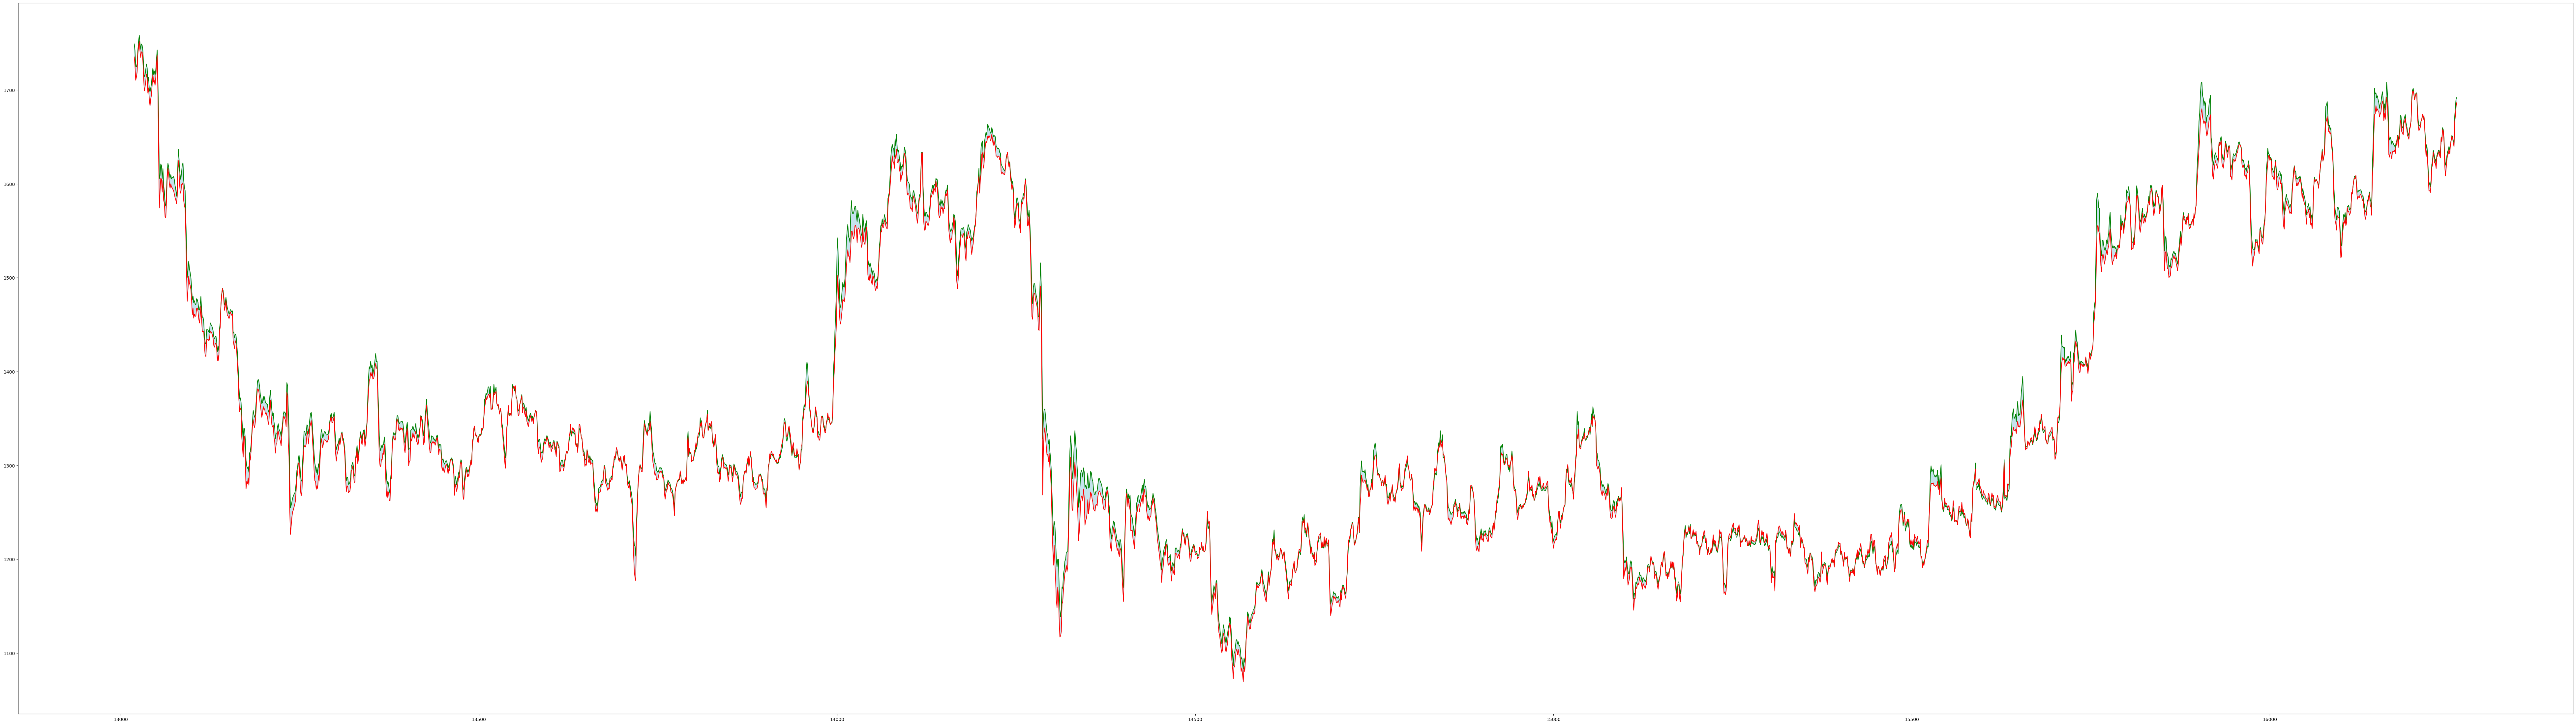

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

x = y_test_h.index

plt.plot(y_test_h['pred'], color='green')
plt.plot(y_test_l['pred'], color='red')
plt.fill_between(x, y_test_h['pred'], y_test_l['pred'], color='lightblue', alpha=0.7)
plt.show()

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(200, 48))

x = y_test_h.index

plt.plot(data['close'], color='black')
plt.plot(y_test_h['pred'], color='green')
plt.plot(y_test_l['pred'], color='red')
plt.fill_between(x, y_test_h['pred'], y_test_l['pred'], color='lightblue', alpha=0.7)
plt.show()

## with backup data:

In [15]:
from talib import RSI
data_backup['rsi_14'] = RSI(data_backup['close'], timeperiod=14)
data_backup['rsi_30'] = RSI(data_backup['close'], timeperiod=30)

from talib import MA, SMA, EMA
data_backup['ma_9'] = MA(data_backup['close'], timeperiod=9)
data_backup['ma_52'] = MA(data_backup['close'], timeperiod=52)

for i in range(1,31):
    data_backup[f'high+{i}'] = data_backup['high'].shift(i)
for i in range(1,31):
    data_backup[f'low+{i}'] = data_backup['low'].shift(i)
data_backup.dropna(axis=0, inplace=True)

inputs_backup_highs = data_backup.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69]]
target_backup_highs = data_backup.iloc[:, [3]]

inputs_backup_lows = data_backup.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69]]
target_backup_lows = data_backup.iloc[:, [4]]

inputs_backup_highs_scaled = scaler_h.transform(inputs_backup_highs)
inputs_backup_lows_scaled = scaler_l.transform(inputs_backup_lows)

pred_backup_highs = model_h.predict(inputs_backup_highs_scaled)
pred_backup_lows = model_l.predict(inputs_backup_lows_scaled)

252/252 [==============================] - 0s 1ms/step


In [16]:
raw_data_backup = data_backup.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
raw_data_backup['pred_highs'] = pred_backup_highs
raw_data_backup['pred_highs'] = raw_data_backup['pred_highs'].shift(1)
raw_data_backup['pred_lows'] = pred_backup_lows
raw_data_backup['pred_lows'] = raw_data_backup['pred_lows'].shift(1)

/tmp/ipykernel_1247569/3210575045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_backup['pred_highs'] = pred_backup_highs
/tmp/ipykernel_1247569/3210575045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_backup['pred_highs'] = raw_data_backup['pred_highs'].shift(1)
/tmp/ipykernel_1247569/3210575045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [17]:
raw_data_backup.to_excel('raw_data_highs_lows_2_500iteration_2.xlsx')